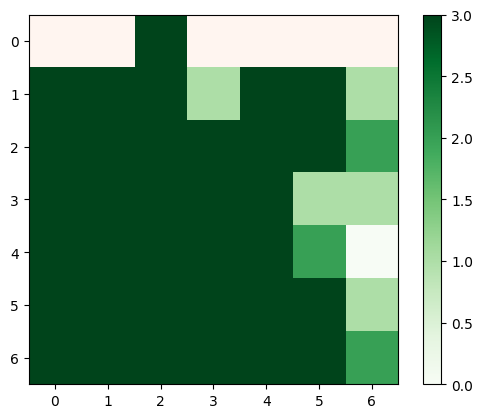

In [15]:
from Dijkstra_module import dijkstra
import numpy as np
import matplotlib.pyplot as plt
import noise
from mapping import generar_mundo
import mapping as mp
from matplotlib.colors import ListedColormap

G = np.array([
    [0, 3, 9, 0, 0, 0, 0],
    [0, 0, 0, 7, 1, 0, 0],
    [0, 2, 0, 7, 0, 0, 0],
    [0, 0, 0, 0, 0, 2, 8],
    [0, 0, 4, 5, 0, 9, 0],
    [0, 0, 0, 0, 0, 0, 4],
    [0, 0, 0, 0, 0, 0, 0],
    ])
G =G.astype(float)
[e,L] = dijkstra(G,0,6)
NumFilas = G.shape[0]
NumColumnas = G.shape[1]
# Convierte los índices lineales a índices de fila y columna
fila, columna = np.unravel_index(L, (NumFilas, NumColumnas))

# Crea una matriz de solución vacía
MatSol = np.zeros((NumFilas, NumColumnas))

# Ajusta las posiciones correspondientes a 1 en MatSol
MatSol[fila, columna] = 1
import pandas as pd

mp.mostrar_mapa2(pd.read_excel('mapaini.xlsx',sheet_name='bosq'),'Greens',MatSol)

In [10]:
def setupgraph(G, b, s):
    G = G.astype(float)
    shape = G.shape
    h = shape[0]
    w = shape[1]
    if s == 1:
        for i in range(h):
            for j in range(w):
                if G[i,j] == 0:
                    G[i,j] = b
    if s == 2:
        for i in range(h):
            for j in range(w):
                if G[i,j] == b:
                    G[i,j] = 0

    return G

def exchangenode(G, a, b):
    # Exchange element at column a with element at column b;
    buffer = G[:,a].copy()
    G[:,a] = G[:,b]
    G[:,b] = buffer

    # Exchange element at row a with element at row b;
    buffer = G[a,:].copy()
    G[a,:] = G[b,:]
    G[b,:] = buffer
    
    return G

def listdijkstra(L, W, s, d):
    index = int(W.shape[0]-1)
    while index > 0:
        if W[1, d] == W[int(W.shape[0]-1), d]:
            L.append(int(s))
            index = 0
        else:
            index2 = int(W.shape[0])
            while int(index2) > 0:
                if W[int(index2)-1, d] < W[int(index2)-2, d]:
                    L.append(int(W[int(index2)-1, 0]))
                    L = listdijkstra(L, W, s, int(W[int(index2-1), 0]))
                    index2 = 0
                else:
                    index2= int(index2) - 1
            index = 0
    return L



In [16]:
def dijkstra(A, s, d):
    if s == d:
        e = 0
        L = [s]
    else:
        A = setupgraph(A,np.inf,1)
        if d == 1:
            d = s
        A = exchangenode(A,0,s)
        lengthA = A.shape[0]
        W = np.zeros(A.shape)
        for i in range(1,lengthA):
            W[0,i] = i
            W[1,i] = A[0,i]
        D =np.zeros((lengthA,2))
        for i in range(lengthA):

            
            print(D)
            D[i,0] = A[0,i]
            D[i,1] = i 

        D2 = D[1:len(D),:]
        L = 1
        while L <= (W.shape[0]-2):
            L = L + 1
            D2 = D2[D2[:,0].argsort()]
            k = D2[0,1]
            W[L,0] = k 
           

            D2 = D2[1:]
            
            for i in range(D2.shape[0]):
                k = int(k)
                l = D[int(D2[i,1]),0] 
                m = D[k,0]+A[k,int(D2[i,1])]
                if l>m:
                    D[int(D2[i,1]),0] = m
                    D2[i,0] = D[int(D2[i,1]),0]
            for i in range(1,A.shape[0]):
                W[L,i] = D[i,0]

        if d == s:
            L = [0]
        else:
            L = [d]
        e = W[W.shape[0]-1,d]
        L = listdijkstra(L,W,s,d)
    return e,L


dijkstra(G,0,6)


[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[inf  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[[inf  0.]
 [ 3.  1.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[[inf  0.]
 [ 3.  1.]
 [ 9.  2.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[[inf  0.]
 [ 3.  1.]
 [ 9.  2.]
 [inf  3.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[[inf  0.]
 [ 3.  1.]
 [ 9.  2.]
 [inf  3.]
 [inf  4.]
 [ 0.  0.]
 [ 0.  0.]]
[[inf  0.]
 [ 3.  1.]
 [ 9.  2.]
 [inf  3.]
 [inf  4.]
 [inf  5.]
 [ 0.  0.]]


(15.0, [6, 5, 3, 4, 1, 0])

In [76]:

G[:,1]
exchangenode(G,1,4)


array([[0., 0., 9., 0., 3., 0., 0.],
       [0., 0., 4., 5., 0., 9., 0.],
       [0., 0., 0., 7., 2., 0., 0.],
       [0., 0., 0., 0., 0., 2., 8.],
       [0., 1., 0., 7., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 4.],
       [0., 0., 0., 0., 0., 0., 0.]])